## 1. Importing Libraries and Loading the dataset:

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [26]:
# Load telco services datasets 

services = pd.read_csv("A:\Data Analytics\Telco\Datasets\Telco_services.csv")
services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [27]:
# Load Demographics Datasets

demographics = pd.read_csv("A:\Data Analytics\Telco\Datasets\Telco_demographics.csv")
demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [28]:
# Load Status Datasets

status = pd.read_csv("A:\Data Analytics\Telco\Datasets\Telco_status.csv")
status.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


## 2. Intergrating the three datasets:

In [29]:
# Merge Telco_services and Telco_demographics on the 'Customer ID' field
merged_data = pd.merge(services, demographics, on='Customer ID', how='left')


# Merge the result with Telco_status on the 'Customer ID' field
telco_data = pd.merge(merged_data, status, on='Customer ID', how='left')
telco_data.head()

,Customer ID,Count_x,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Count,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


## 3. Data Cleaning, EDA, and Preprocessing:

In [30]:
# Check information about the given datasets
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count_x                            7043 non-null   int64  
 2   Quarter_x                          7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [31]:
#Check for Null values:
null_values = telco_data.isnull().sum()

# Print the result
print("Null values in each column:")
print(null_values)

Null values in each column:
Customer ID                             0
Count_x                                 0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Paymen

In [32]:
# Using Imputation to fill NULL Values

# 1. Fill NULL values in 'Internet Type' and 'Offer' with the most frequent value (mode)
telco_data['Internet Type'].fillna(telco_data['Internet Type'].mode()[0], inplace=True)
telco_data['Offer'].fillna(telco_data['Offer'].mode()[0], inplace=True)

In [33]:
telco_data.isnull().sum()

Customer ID                             0
Count_x                                 0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [34]:
#Delete columns with Null Values:
df1 = telco_data.dropna(axis=1)

# Print the remaining columns
df1.isnull().sum()

Customer ID                          0
Count_x                              0
Quarter_x                            0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [35]:
# Check for duplicate rows
duplicates = df1[df1.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 Empty DataFrame
Columns: [Customer ID, Count_x, Quarter_x, Referred a Friend, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Count_y, Gender, Age, Under 30, Senior Citizen, Married, Dependents, Number of Dependents, Count, Quarter_y, Satisfaction Score, Customer Status, Churn Label, Churn Value, Churn Score, CLTV]
Index: []

[0 rows x 46 columns]


In [36]:
#Delete columns with Null Values:
df1 = telco_data.dropna(axis=1)

# Print the remaining columns
df1.isnull().sum()

Customer ID                          0
Count_x                              0
Quarter_x                            0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [37]:
# Check data types of each column
data_types = df1.dtypes

# Display the data types
print("Data Types of Each Column:\n", data_types)

Data Types of Each Column:
 Customer ID                           object
Count_x                                int64
Quarter_x                             object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                   

In [38]:
# Check for outliers using Z- Score

# Z-score calculation
from scipy import stats

# Select numerical columns to check for outliers
numerical_columns = df1.select_dtypes(include=[np.number])

# Calculate Z-scores for each value in the numerical columns
z_scores = np.abs(stats.zscore(numerical_columns))

# Identify outliers (Z-score > 3 is often considered an outlier)
outliers = (z_scores > 3)

# Print out the rows and columns where outliers exist
print("Outliers based on Z-score:")
print(df1[outliers.any(axis=1)])

Outliers based on Z-score:
     Customer ID  Count_x Quarter_x Referred a Friend  Number of Referrals  \
2     1658-BYGOY        1        Q3                No                    0   
7     3445-HXXGF        1        Q3               Yes                    6   
10    0094-OIFMO        1        Q3                No                    0   
24    9057-MSWCO        1        Q3                No                    0   
26    0533-BNWKF        1        Q3               Yes                    2   
...          ...      ...       ...               ...                  ...   
7036  8456-QDAVC        1        Q3                No                    0   
7037  7750-EYXWZ        1        Q3                No                    0   
7039  6840-RESVB        1        Q3               Yes                    1   
7040  2234-XADUH        1        Q3               Yes                    4   
7041  4801-JZAZL        1        Q3               Yes                    1   

      Tenure in Months    Offer Phon

In [39]:
df1.describe()

,Count_x,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_y,Age,Number of Dependents,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,1.0,46.509726,0.468692,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,0.0,16.750352,0.962802,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.0,19.000000,0.000000,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,1.0,32.000000,0.000000,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,1.0,46.000000,0.000000,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,1.0,60.000000,0.000000,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.0,80.000000,9.000000,1.0,5.000000,1.000000,96.000000,6500.000000


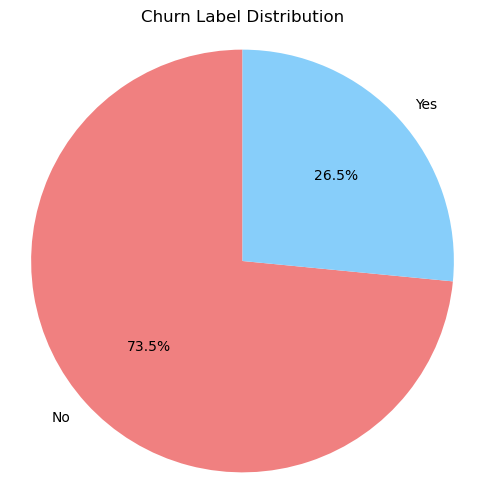

In [40]:
# Calculate the distribution of 'Churn Label'
churn_distribution = df1['Churn Label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

# Display the chart
plt.title('Churn Label Distribution')
plt.axis('equal')  
plt.show()

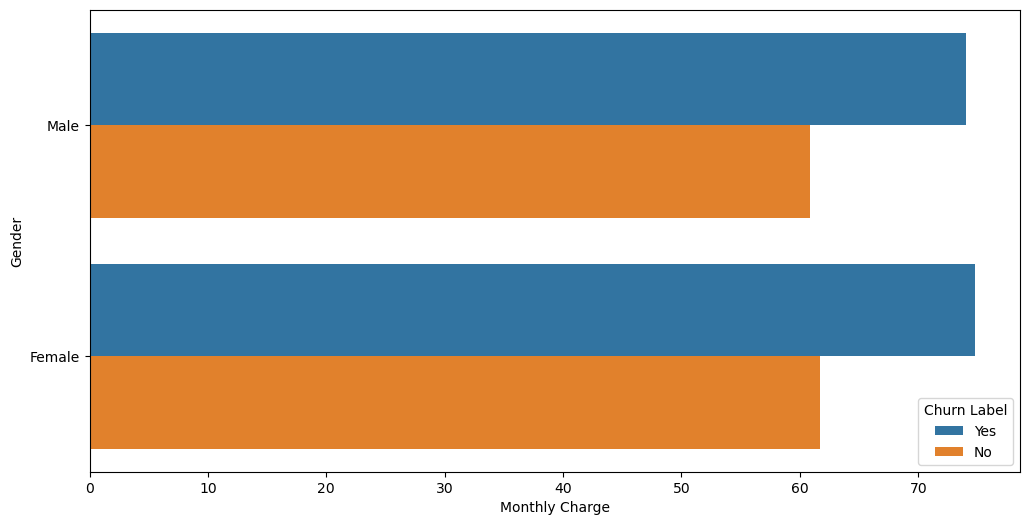

In [41]:
plt.figure(figsize=(12,6))
fig = sns.barplot(
    data = df1,
    x = 'Monthly Charge' , 
    y = 'Gender',
    hue='Churn Label',  
    errorbar=None
)

plt.show()

In [42]:
df_aggregated = df1['Total Charges'].sum()

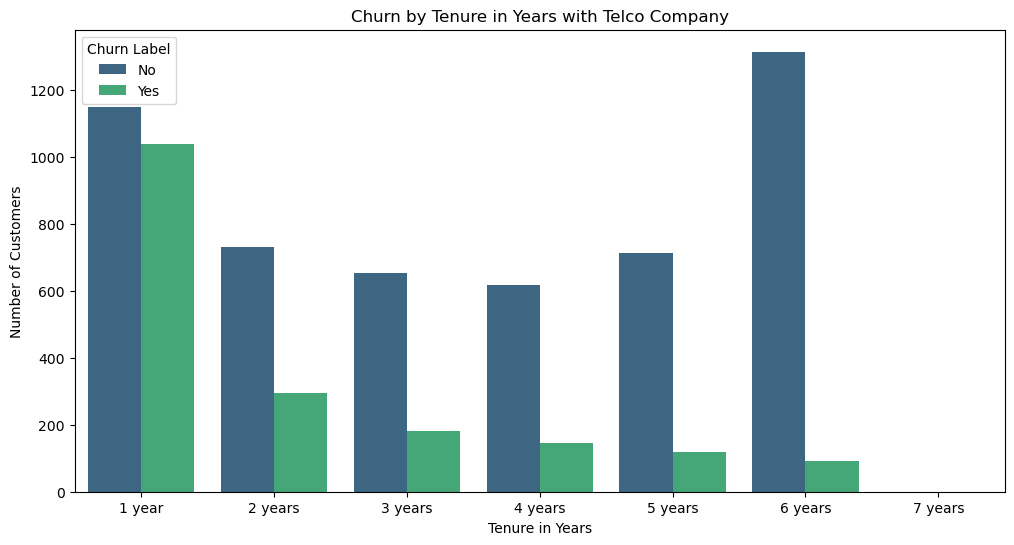

<Figure size 640x480 with 0 Axes>

In [43]:
# Set the figure size for the first plot
plt.figure(figsize=(12, 6))

# Define the bin edges for years (1 to 12 months as 1 year, 13 to 24 months as 2 years, etc.)
bins = [0, 12, 24, 36, 48, 60, 72, 84 ]  # Adjust the range based on your data

# Define corresponding labels for the bins (1 year, 2 years, etc.)
labels = ['1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years']

# Use pd.cut to create the new 'Tenure Group' column
df1['Tenure Group'] = pd.cut(df1['Tenure in Months'], bins=bins, labels=labels, right=True)

# Create a grouped bar plot using 'Tenure in Months' and 'Churn Label'
sns.countplot(data=df1, x='Tenure Group', hue='Churn Label', palette='viridis', hue_order=['No', 'Yes'])

# Add title and labels
plt.title('Churn by Tenure in Years with Telco Company')
plt.xlabel('Tenure in Years')
plt.ylabel('Number of Customers')

# Display the first plot
plt.show()


# Add title for the second plot
plt.subplots_adjust(top=0.9)
plt.suptitle('Churn by Tenure and Internet Service', size=16)

# Display the second plot
plt.show()

## 4. Data Transformations

In [44]:
# List of columns to drop
columns_to_drop = [
    'Customer ID', 'Quarter_x', 'Online Security', 'Online Backup', 
    'Device Protection Plan', 'Premium Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 
    'Unlimited Data', 'Paperless Billing', 'Number of Dependents', 
    'Dependents', 'Count', 'Quarter_y', 'Satisfaction Score', 
    'CLTV', 'Count_y', 'Tenure Group', 'Churn Value', 'Customer Status'
]

# Drop the specified columns
df1.drop(columns=columns_to_drop, inplace=True)

## 4.Feature Engineering

### 4.1 Binning

In [45]:
# Define the bin edges for years (1 to 12 months as 1 year, 13 to 24 months as 2 years, etc.)
bins = [0, 12, 24, 36, 48, 60, 72, 84 ]  # Adjust the range based on your data

# Define corresponding labels for the bins (1 year, 2 years, etc.)
labels = ['1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years']

# Use pd.cut to create the new 'Tenure Group' column
df1['Tenure Group'] = pd.cut(df1['Tenure in Months'], bins=bins, labels=labels, right=True)

df_selection = df1[['Tenure in Months', 'Tenure Group']]
df_selection

,Tenure in Months,Tenure Group
0,1,1 year
1,8,1 year
2,18,2 years
3,25,3 years
4,37,4 years
...,...,...
7038,72,6 years
7039,24,2 years
7040,72,6 years
7041,11,1 year


### 4.2 Contract Tenure Ratio Calculation

In [46]:

contract_mapping = {
    'Month-to-Month': 1,  # Consider 1 month for month-to-month contracts
    'One Year': 12,       # 12 months for one-year contracts
    'Two Year': 24        # 24 months for two-year contracts
}

# Step 2: Create a new column 'ContractPeriod' using the mapping
df1['ContractPeriod'] = df1['Contract'].map(contract_mapping)

# Step 3: Calculate the ContractTenureRatio as tenure / ContractPeriod
df1['ContractTenureRatio'] = df1['Tenure in Months'] / df1['ContractPeriod']

# Display the DataFrame with the new column
print(df1[['Tenure in Months', 'Contract', 'ContractPeriod', 'ContractTenureRatio']])

      Tenure in Months        Contract  ContractPeriod  ContractTenureRatio
0                    1  Month-to-Month               1                 1.00
1                    8  Month-to-Month               1                 8.00
2                   18  Month-to-Month               1                18.00
3                   25  Month-to-Month               1                25.00
4                   37  Month-to-Month               1                37.00
...                ...             ...             ...                  ...
7038                72        Two Year              24                 3.00
7039                24        One Year              12                 2.00
7040                72        One Year              12                 6.00
7041                11  Month-to-Month               1                11.00
7042                66        Two Year              24                 2.75

[7043 rows x 4 columns]


In [47]:
# Exporting cleaned dataset before Normalization:

import os

file_path = r'A:\Data Analytics\Telco\data'
directory = r'A:\Data Analytics\Telco\data'
file_name = 'Churn_Dataset.csv'
file_path = os.path.join(directory, file_name)

# Export DataFrame to CSV
df1.to_csv(file_path, index=False)


In [48]:
df = df1
df.head()

,Count_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Gender,Age,Under 30,Senior Citizen,Married,Churn Label,Churn Score,Tenure Group,ContractPeriod,ContractTenureRatio
0,1,No,0,1,Offer B,No,0.00,No,Yes,DSL,...,Male,78,No,Yes,No,Yes,91,1 year,1,1.0
1,1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,...,Female,74,No,Yes,Yes,Yes,69,1 year,1,8.0
2,1,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Male,71,No,Yes,No,Yes,81,2 years,1,18.0
3,1,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Female,78,No,Yes,Yes,Yes,88,3 years,1,25.0
4,1,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,...,Female,80,No,Yes,Yes,Yes,67,4 years,1,37.0


### 4.3 Scaling to Numeric features usig LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [50]:
df.drop('Tenure Group', axis=1, inplace=True)

In [51]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert object columns to integers
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Convert float columns to integers by rounding
for col in df.select_dtypes(include=['float']).columns:
    df[col] = df[col].round().astype(int)  # or use .astype(int) for truncation

# Display the DataFrame to verify the conversions
df.head()

,Count_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Churn Label,Churn Score,ContractPeriod,ContractTenureRatio
0,1,0,0,1,1,0,0,0,1,1,...,60,1,78,0,1,0,1,91,1,1
1,1,1,1,8,4,1,49,1,1,2,...,1024,0,74,0,1,1,1,69,1,8
2,1,0,0,18,3,1,11,1,1,2,...,1911,1,71,0,1,0,1,81,1,18
3,1,1,1,25,2,1,20,0,1,2,...,2995,0,78,0,1,1,1,88,1,25
4,1,1,1,37,2,1,6,1,1,2,...,3102,0,80,0,1,1,1,67,1,37


### 4.4 Normalization using standard Scaler

In [52]:
# Initiating standard scaler:
scaler = StandardScaler()

# Apply standard scaling to numerical features
# Select columns to scale (e.g., all columns here)
numerical_columns = df.select_dtypes(include=[float, int]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,Count_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Churn Label,Churn Score,ContractPeriod,ContractTenureRatio
0,0.0,-0.918278,-0.650409,-1.278988,-0.445478,-3.054010,-1.485900,-0.854176,0.525927,-0.760820,...,-1.038179,0.990532,1.880110,-0.498313,2.273159,-0.966622,1.663829,1.535060,-0.881056,-0.642239
1,0.0,1.088995,-0.317185,-0.993743,2.233093,0.327438,1.685430,1.170719,0.525927,0.675378,...,-0.701705,-1.009559,1.641292,-0.498313,2.273159,1.034530,1.663829,0.495781,-0.881056,-0.156647
2,0.0,-0.918278,-0.650409,-0.586250,1.340236,0.327438,-0.773969,1.170719,0.525927,0.675378,...,-0.392106,0.990532,1.462179,-0.498313,2.273159,-0.966622,1.663829,1.062661,-0.881056,0.537056
3,0.0,1.088995,-0.317185,-0.301005,0.447379,0.327438,-0.191480,-0.854176,0.525927,0.675378,...,-0.013746,-1.009559,1.880110,-0.498313,2.273159,1.034530,1.663829,1.393340,-0.881056,1.022648
4,0.0,1.088995,-0.317185,0.187986,0.447379,0.327438,-1.097574,1.170719,0.525927,0.675378,...,0.023601,-1.009559,1.999519,-0.498313,2.273159,1.034530,1.663829,0.401301,-0.881056,1.855092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,-0.918278,-0.650409,1.614210,-0.445478,0.327438,0.002683,-0.854176,-1.901403,0.675378,...,0.001961,-1.009559,-0.985705,-0.498313,-0.439916,-0.966622,-0.601023,-0.637977,1.483486,-0.503499
7039,0.0,1.088995,-0.317185,-0.341755,0.447379,0.327438,0.844057,1.170719,0.525927,-2.197017,...,-0.079366,0.990532,-0.508069,-0.498313,-0.439916,1.034530,-0.601023,0.023382,0.249812,-0.572869
7040,0.0,1.088995,0.682487,1.614210,-0.445478,0.327438,0.455731,1.170719,0.525927,0.675378,...,2.240356,-1.009559,-0.985705,-0.498313,-0.439916,1.034530,-0.601023,0.590261,0.249812,-0.295388
7041,0.0,1.088995,-0.317185,-0.871495,-0.445478,-3.054010,-1.485900,-0.854176,0.525927,-0.760820,...,-0.947778,-1.009559,-0.866296,-0.498313,-0.439916,1.034530,-0.601023,0.023382,-0.881056,0.051464


In [53]:
df.drop('Count_x', axis=1, inplace=True)

<Axes: >

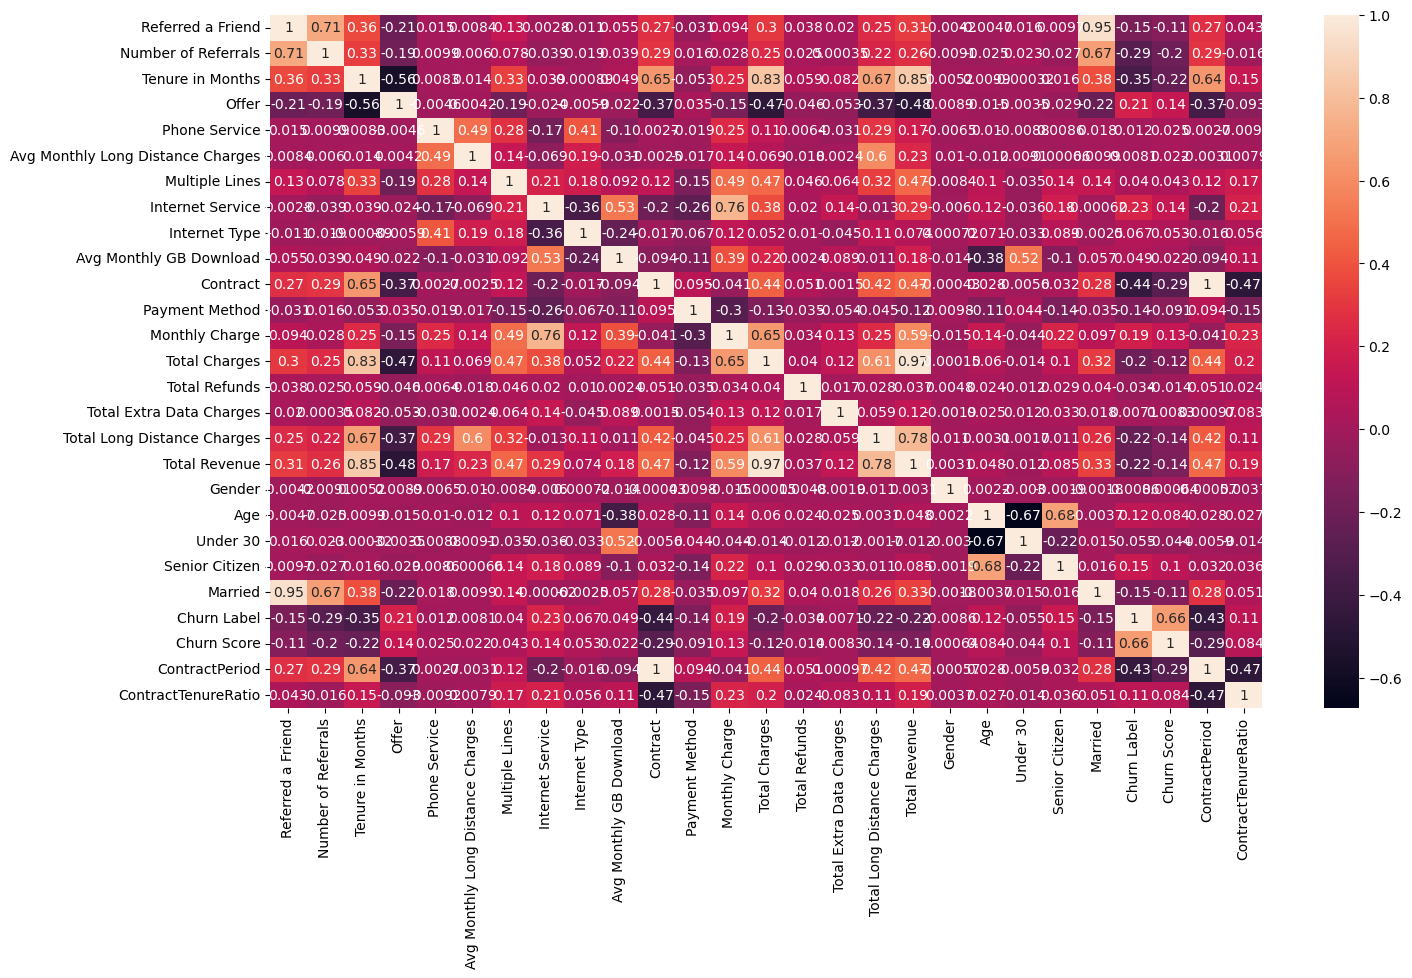

In [54]:
# Heatmap showing correlation
import seaborn as sns

corr=df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [148]:
from sklearn.preprocessing import MinMaxScaler

# Initiating MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical features
# Select columns to scale (e.g., all columns here)
numerical_columns = df.select_dtypes(include=[float, int]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Age,Under 30,Senior Citizen,Married,Customer Status,Churn Label,Churn Value,Churn Score,ContractPeriod,ContractTenureRatio
0,0.0,0.000000,0.000000,0.25,0.0,0.00,0.0,1.0,0.5,0.094118,...,0.967213,0.0,1.0,0.0,0.0,1.0,1.0,0.945055,0.0,0.013889
1,1.0,0.090909,0.098592,1.00,1.0,0.98,1.0,1.0,1.0,0.200000,...,0.901639,0.0,1.0,1.0,0.0,1.0,1.0,0.703297,0.0,0.111111
2,0.0,0.000000,0.239437,0.75,1.0,0.22,1.0,1.0,1.0,0.611765,...,0.852459,0.0,1.0,0.0,0.0,1.0,1.0,0.835165,0.0,0.250000
3,1.0,0.090909,0.338028,0.50,1.0,0.40,0.0,1.0,1.0,0.141176,...,0.967213,0.0,1.0,1.0,0.0,1.0,1.0,0.912088,0.0,0.347222
4,1.0,0.090909,0.507042,0.50,1.0,0.12,1.0,1.0,1.0,0.164706,...,1.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.681319,0.0,0.513889


### Saving the dataset

In [55]:
df.to_csv('saved_dataset.csv', index=False)

In [56]:
# Exporting Normalized Dataset for the Next Assignment: 

file_path = r'A:\Data Analytics\Telco\data'
directory = r'A:\Data Analytics\Telco\data'
file_name = 'Normalized_Churn_Dataset.csv'
file_path = os.path.join(directory, file_name)

# Export DataFrame to CSV
df.to_csv(file_path, index=False)
